In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
import statistics
from datetime import datetime
from scipy import stats

from statistics import variance
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
import statsmodels.tsa.stattools as ts



# Question 1

In [2]:

#loading the file into python
EirGridSystem = pd.read_csv('EirGridSystemDemand2014.csv')
# coverting values of Time column into string
EirGridSystem['Time'] =' ' + EirGridSystem['Time'].astype(str)

# joining both Date column and Time column into new Date column
EirGridSystem.Date= EirGridSystem.Date+EirGridSystem.Time 

# converting Date column into datetime
EirGridSystem.Date=pd.to_datetime(EirGridSystem.Date) 
#displaying first 10 rows
EirGridSystem.head(10)

,Date,Time,Demand
0,2014-01-01 00:00:00,0:00,2899.0
1,2014-01-01 00:15:00,0:15,2869.0
2,2014-01-01 00:30:00,0:30,2827.0
3,2014-01-01 00:45:00,0:45,2787.0
4,2014-01-01 01:00:00,1:00,2724.0
5,2014-01-01 01:15:00,1:15,2687.0
6,2014-01-01 01:30:00,1:30,2596.0
7,2014-01-01 01:45:00,1:45,2543.0
8,2014-01-01 02:00:00,2:00,2483.0
9,2014-01-01 02:15:00,2:15,2438.0


## Checking for nan values 

In [3]:
# checking the Nan values
EirGridSystem.isnull().sum()

Date      0
Time      0
Demand    5
dtype: int64

## Filling nan values with interpolation

In [4]:
# Filling the Nan Values with linear interpolation
EirGridSystem.Demand=EirGridSystem.Demand.interpolate(method='linear')

In [5]:
# checking the Nan values
EirGridSystem.isnull().sum() 


Date      0
Time      0
Demand    0
dtype: int64

##  Plot the graph

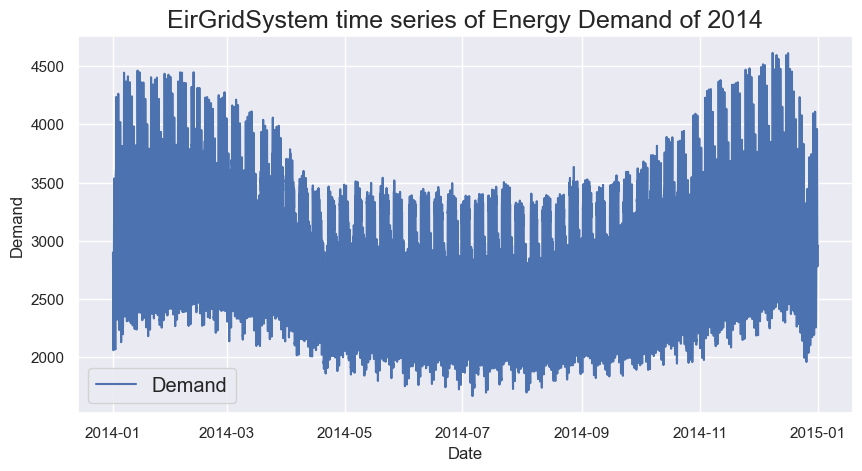

In [6]:
#figure size
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
sns.set()
#ploting the demand of EirGridSystem
sns.lineplot(EirGridSystem.Date,EirGridSystem['Demand'])

#setting the title
plt.title('EirGridSystem time series of Energy Demand of 2014',fontsize=18)

#setting labels
plt.legend(labels=["Demand"],fontsize = 'large')

#displaying the graph
plt.show() 


# Question 2

In [7]:
#calculating autocorrelation
autocorrelation=sm.tsa.acf(EirGridSystem['Demand'],nlags=960) 

#printing autocorrelation
print(autocorrelation.round(3)) 


[ 1.     0.996  0.986  0.969  0.948  0.922  0.893  0.86   0.825  0.787
  0.747  0.706  0.664  0.62   0.576  0.531  0.485  0.44   0.394  0.349
  0.304  0.259  0.216  0.173  0.132  0.092  0.053  0.017 -0.018 -0.051
 -0.082 -0.111 -0.138 -0.163 -0.186 -0.208 -0.228 -0.246 -0.263 -0.278
 -0.292 -0.304 -0.315 -0.326 -0.334 -0.341 -0.347 -0.35  -0.352 -0.352
 -0.35  -0.346 -0.341 -0.333 -0.325 -0.315 -0.304 -0.292 -0.278 -0.263
 -0.246 -0.227 -0.207 -0.185 -0.161 -0.135 -0.107 -0.078 -0.046 -0.012
  0.023  0.06   0.099  0.139  0.181  0.223  0.266  0.309  0.353  0.397
  0.44   0.484  0.527  0.569  0.61   0.65   0.689  0.727  0.762  0.795
  0.825  0.852  0.876  0.895  0.91   0.919  0.922  0.918  0.908  0.893
  0.873  0.849  0.821  0.789  0.756  0.719  0.681  0.641  0.6    0.557
  0.514  0.47   0.425  0.38   0.335  0.291  0.246  0.202  0.159  0.117
  0.076  0.036 -0.002 -0.039 -0.073 -0.106 -0.137 -0.166 -0.193 -0.218
 -0.242 -0.263 -0.283 -0.301 -0.318 -0.333 -0.347 -0.359 -0.371 -0.381
 -0.38

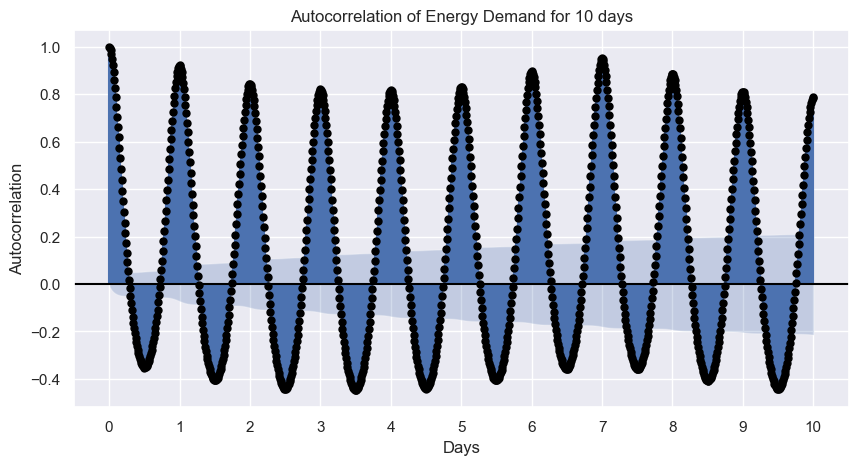

In [8]:
#ploting the autocorelation plot
plot_acf(EirGridSystem['Demand'],color='black', lags=960)
sns.set()
# providing x_label
plt.xlabel('Days')

# providing y_label
plt.ylabel('Autocorrelation')

#setting new label coresponding 10 days 
labels=(range(0,11))

#setting xticks corresponding to 10 days
plt.xticks(np.arange(0,970,96), labels)

#title of the plot
plt.title('Autocorrelation of Energy Demand for 10 days')

#displaying the plot
plt.show()

# Question 3

In [9]:
#creating a numerical columns from date column
EirGridSystem['date_numeric'] = EirGridSystem['Date'].apply(lambda x: x.value)

#normaliziting the numerical column between 0 and 1
EirGridSystem['Normalized_date']=EirGridSystem['date_numeric'].transform(lambda x: (x - x.min())/ (x.max() - x.min()))

#droping a nolonger wanted column
EirGridSystem.drop(columns='date_numeric',inplace=True)

#displaying first 10 rows
EirGridSystem.head(10)

,Date,Time,Demand,Normalized_date
0,2014-01-01 00:00:00,0:00,2899.0,0.000000
1,2014-01-01 00:15:00,0:15,2869.0,0.000029
2,2014-01-01 00:30:00,0:30,2827.0,0.000057
3,2014-01-01 00:45:00,0:45,2787.0,0.000086
4,2014-01-01 01:00:00,1:00,2724.0,0.000114
5,2014-01-01 01:15:00,1:15,2687.0,0.000143
6,2014-01-01 01:30:00,1:30,2596.0,0.000171
7,2014-01-01 01:45:00,1:45,2543.0,0.000200
8,2014-01-01 02:00:00,2:00,2483.0,0.000228
9,2014-01-01 02:15:00,2:15,2438.0,0.000257


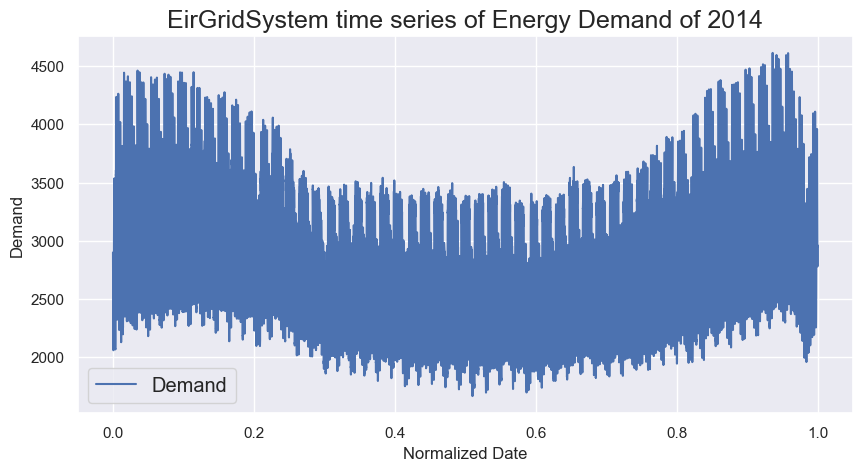

In [10]:
#figure size
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
sns.set()
#Plotting the graph
sns.lineplot(EirGridSystem['Normalized_date'],EirGridSystem['Demand'])

#Setting the title
plt.title('EirGridSystem time series of Energy Demand of 2014',fontsize=18)

#Setting x label
plt.xlabel('Normalized Date')

#Setting graph labels
plt.legend(labels=["Demand"],fontsize = 'large')

# displaying the graph
plt.show() 


# Question 4

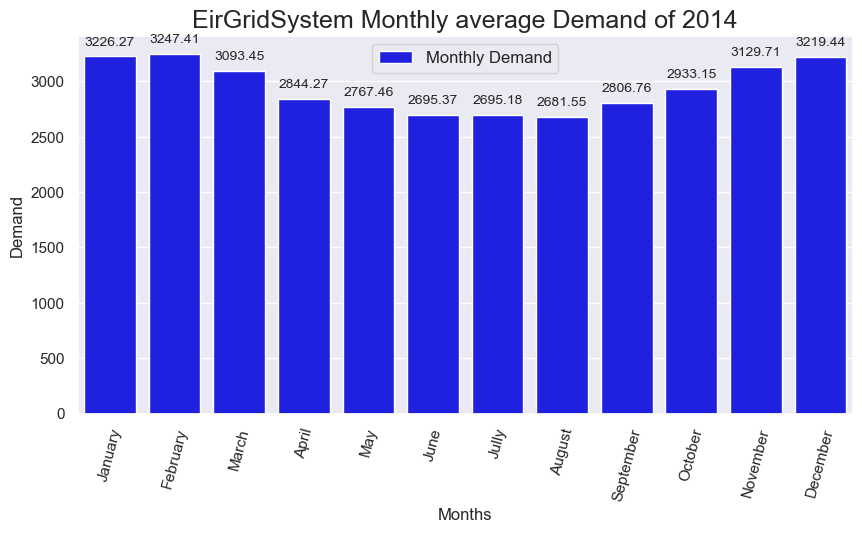

January      3226.265793
February     3247.410342
March        3093.453629
April        2844.273264
May          2767.462030
June         2695.365278
Jully        2695.177083
August       2681.552419
September    2806.761111
October      2933.151210
November     3129.710764
December     3219.443212
Name: Demand, dtype: float64

In [11]:
# monthly resampling of my data
EirGridSystem_month=EirGridSystem.set_index('Date').resample('M').mean() 

#setting the Index 
EirGridSystem_month.index=['January','February','March','April','May','June','Jully','August','September','October','November','December']

#ploting daily resampled data
sns.set()
plots = sns.barplot(x=EirGridSystem_month.index, y="Demand", color='blue', label="Monthly Demand",data=EirGridSystem_month)

# the loop below will anotate the bars in bar graph
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center',size=10, xytext=(0, 8),
                   textcoords='offset points')

# title of plot and its sizwe
plt.title('EirGridSystem Monthly average Demand of 2014',fontsize=18) 

# plt.text(EirGridSystem_month, EirGridSystem_month['Demand'], s,)

#rotating the label
plt.xticks(rotation=75)

#y label
plt.ylabel('Demand')
#x label
plt.xlabel('Months')
# legend of plot
plt.legend(fontsize = 'medium')

# displaying the graph
plt.show() 

# displaying the monthly demand
EirGridSystem_month['Demand']



# Question 5

In [12]:
# hourly resampling of my data
EirGridSystem_hourly=EirGridSystem.set_index('Date').resample('H').mean() 
# creating the hour column
EirGridSystem_hourly['Hours']=EirGridSystem_hourly.index.hour

hours_means=[]
for i in range(0,24):
    # hourly means
    means=EirGridSystem_hourly[EirGridSystem_hourly['Hours']==i]['Demand'].mean()
    hours_means.append(means)
#creating hourly means dataframe
hours_df=pd.DataFrame(hours_means)
#Setting dataframe index
hours_df.index=['00h','01h','02h','03h','04h','05h','06h','07h','08h','09h','10h','11h','12h','13h','14h','15h','16h','17h','18h','19h','20h','21h','22h','23h']
#renaming the hourly mean column
hours_df.rename(columns = {0:'Hourly Mean'}, inplace = True)
#displaying the dataframe
print(hours_df.head(12))
print(hours_df.tail(12))
hours_df

     Hourly Mean
00h  2531.269178
01h  2330.620548
02h  2193.935616
03h  2122.717123
04h  2102.480137
05h  2116.065068
06h  2272.093151
07h  2661.797260
08h  2990.205479
09h  3192.756164
10h  3291.715753
11h  3342.379452
     Hourly Mean
12h  3385.669863
13h  3348.401370
14h  3288.968493
15h  3283.526027
16h  3363.330137
17h  3537.221233
18h  3562.597945
19h  3462.590411
20h  3334.893151
21h  3196.415068
22h  2968.543151
23h  2760.189726


,Hourly Mean
00h,2531.269178
01h,2330.620548
02h,2193.935616
03h,2122.717123
04h,2102.480137
05h,2116.065068
06h,2272.093151
07h,2661.797260
08h,2990.205479
09h,3192.756164


## Plotting daily profile

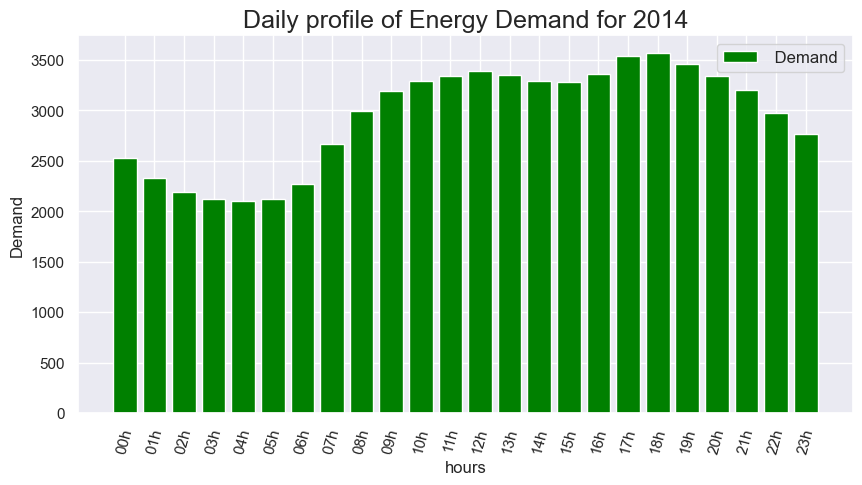

In [13]:
#ploting hourly resampled data
sns.set(palette='dark')
plt.bar(hours_df.index,hours_df['Hourly Mean'],color='green')

# title of plot
plt.title('Daily profile of Energy Demand for 2014',fontsize=18)
#y label
plt.ylabel('Demand')
#x label
plt.xlabel('hours')

# rotating the label
plt.xticks(rotation=75)
# legend of plot
plt.legend(labels=[" Demand"],fontsize = 'medium')
# displaying the graph
plt.show() 

# Question 6

In [14]:
# resampling the data into daily basis
EirGridSystem_daily=EirGridSystem.set_index('Date').resample('D').mean()

#creating days number columns
EirGridSystem_daily['days']=EirGridSystem_daily.index.dayofweek

#displaying the results
EirGridSystem_daily

,Demand,Normalized_date,days
Date,,,
2014-01-01,2764.677083,0.001356,2
2014-01-02,3127.572917,0.004095,3
2014-01-03,3252.531250,0.006835,4
2014-01-04,3014.114583,0.009575,5
2014-01-05,2914.395833,0.012315,6
...,...,...,...
2014-12-27,2817.364583,0.987685,5
2014-12-28,2866.927083,0.990425,6
2014-12-29,3078.114583,0.993165,0


In [15]:
# Initializing empty list of daily means of each day of week
daily_means=[] 
for i in range(0,7):
    # mean of each day 
    means=EirGridSystem_daily[EirGridSystem_daily['days']==i]['Demand'].mean()
    daily_means.append(means)

#daily mean dataframe
days_df=pd.DataFrame(daily_means)    
# crating day index
days_df.index=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#renaming the daily  mean column
days_df.rename(columns = {0:'Day Mean'}, inplace = True)
#displaying the data
days_df

,Day Mean
Monday,2966.307292
Tuesday,3052.404647
Wednesday,3059.144458
Thursday,3063.700521
Friday,3031.418470
Saturday,2783.925681
Sunday,2644.316707


## plotting the days mainly 

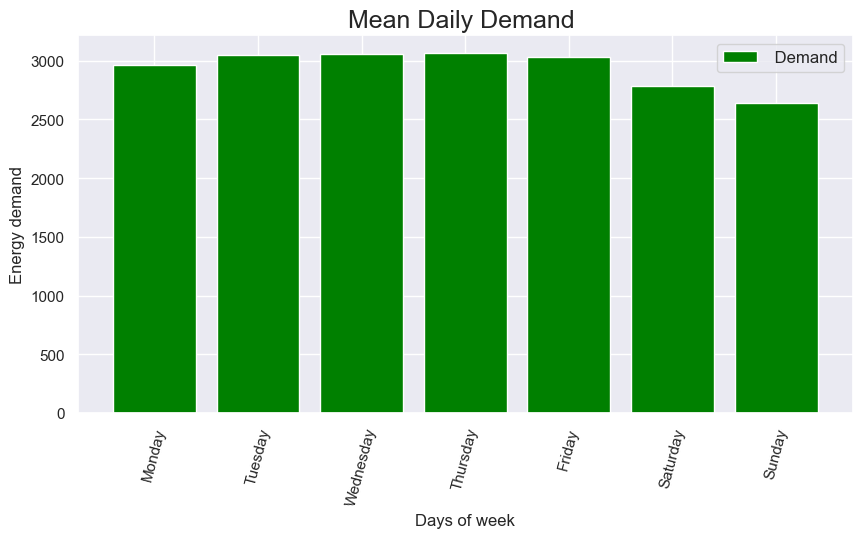

In [16]:
#ploting daily resampled data
sns.set()
plt.bar(days_df.index,days_df['Day Mean'], color='green')

 # title of plot
plt.title('Mean Daily Demand ',fontsize=18)
# xlabels
plt.xlabel('Days of week')
plt.ylabel('Energy demand')

#rotating labels
plt.xticks(rotation=75)
# legend of plots
plt.legend(labels=[" Demand"],fontsize = 'medium') 
# displaying the graph
plt.show() 

# Question 7

In [17]:
#creating days column from hourly resampled data 
EirGridSystem_hourly['days']= EirGridSystem_hourly.index.dayofweek
''' 
The loop below will create a list cointaining hourly demand for  each day 
'''
# initialising empty list of hourly demand
hours_means=[]

#looping from days of the week
for i in range(0,7):
    data=EirGridSystem_hourly[EirGridSystem_hourly['days']==i]['Demand']
    hours_means.append(data) # appending the separated days into the initialised list

# coverting the list into dataframe and transposing it.
hours_means_df =pd.DataFrame(hours_means).transpose()

# seting the column time for each day
hours_means_df.columns=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']




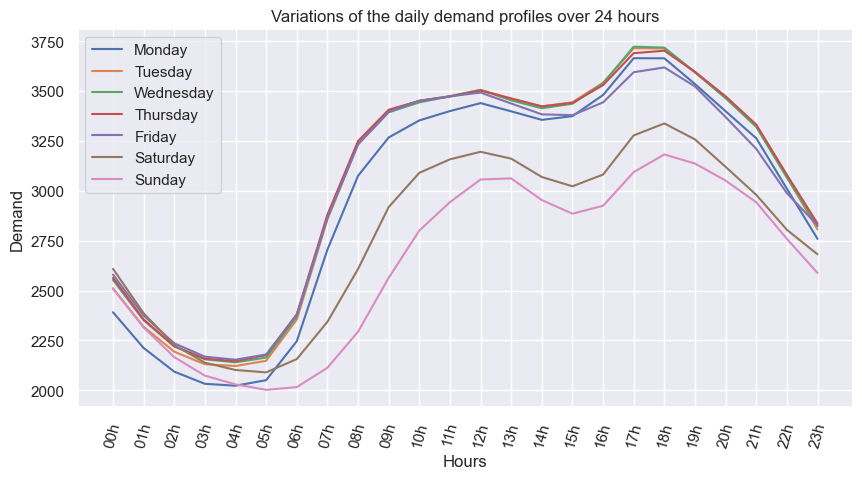

In [18]:
'''
The loop below will plot the daily profile of each day of the week
'''

# loopping from each day
for column in hours_means_df.columns:
    # dropping the Nan values in each day dataframe
    df=pd.DataFrame(hours_means_df[column].dropna())
    #creating the hour column for each day data
    df['hourz']=df.index.hour
    '''
    The loop below will plot hourly means for each day of the week
    '''
    each_day_hourly_data=[]  # initializing empty list
    for i in range(0,24): #looping in hours  
        means=df[df['hourz']==i][column].mean() # getting hourly means for each day
        each_day_hourly_data.append(means) ## appending each day into their list
        
    # coverting the list into dataframe
    each_day_data_df=pd.DataFrame(each_day_hourly_data) 
    # setting the indexes for the dataframe
    each_day_data_df.index=['00h','01h','02h','03h','04h','05h','06h','07h','08h','09h','10h','11h','12h','13h','14h','15h','16h','17h','18h','19h','20h','21h','22h','23h']
    
    #plotting the graph for each day of the week
    sns.lineplot(each_day_data_df.index,each_day_data_df[0],label=column)
    
    #rotating the label
    plt.xticks(rotation=75)
    #setting grid
    sns.set_style("darkgrid")
    # providing legend
    plt.legend()
    #setting x label
    plt.xlabel('Hours')
    #setting y label
    plt.ylabel('Demand')
    #setting title
    plt.title('Variations of the daily demand profiles over 24 hours')
plt.show()  # displaying the graphs 


# Question 8



In [19]:
# Setting column date into index
EirGridSystem_hypo =EirGridSystem.set_index('Date')

# creating days column from dataset
EirGridSystem_hypo['days'] = EirGridSystem_hypo.index.dayofweek

#creating weekend days dataframe
weekend_days= EirGridSystem_hypo[EirGridSystem_hypo['days']>4]

#creating working day dataframe
working_days=EirGridSystem_hypo[EirGridSystem_hypo['days']<=4]



In [20]:
'''
Null hypothesis(H0): There is statistically significant difference between energy demand during the 
weekend and during the weekday 
'''
# calculating variance for weekend days energy demand
weekend_days_var=variance(weekend_days['Demand'])

#calculating variance for working days energy demand
working_days_var=variance(working_days['Demand'])

# print variance for working days energy demand
print(f'Working days variance is {working_days_var}')

# variance for weekend days energy demand
print(f'Weekend days variance is {weekend_days_var}')
  
# permformind the t_test
t_value,p_value=stats.ttest_ind(weekend_days['Demand'],working_days['Demand'],equal_var=False)

#printing the T statistic
print(f'T statistic: {t_value.round(4)}')

# printing the p_values
print(f'p-value: {p_value.round(4)}')

#setting significance level to 0.05
significance_level=0.05

'''
The loop below will indicate whether we reject the null hypothesis or fail to reject
'''
if p_value<=significance_level:
    print(f'since {p_value.round(4)} is less than the significance level of  {significance_level}, We reject the null hypothesis H0')

else: 
    
    print(f'Since {p_value.round(4)} is greater than the significance level of {significance_level} , We fail to reject the null hypothesis H0')

Working days variance is 378712.6768183161
Weekend days variance is 237994.6878248391
T statistic: -51.3634
p-value: 0.0
since 0.0 is less than the significance level of  0.05, We reject the null hypothesis H0


# Question 9

In [21]:
#getting the length of the dataset
length=len(EirGridSystem)

# getting the firt half of the dataset
first_half = EirGridSystem.iloc[:int(length/2),:]

#getting the second half of the dataset
second_half = EirGridSystem.iloc[int(length/2):,:]


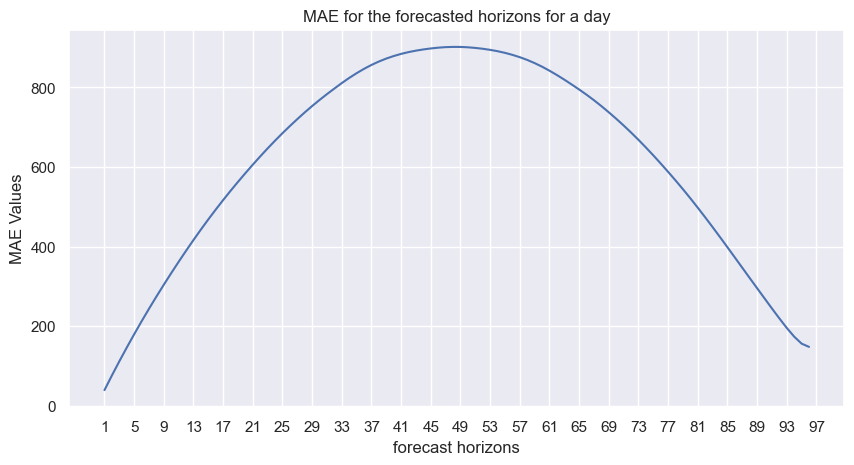

,MAE
1,39.704167
2,76.386187
3,111.963299
4,146.377283
5,179.855993
...,...
92,219.847260
93,195.831849
94,173.973459
95,156.427511


In [22]:
MAE=[] #initialiazing mae empty list
'''
The following loop will provide the shifts for energy demand for the second half of the dataset and 
compare it with the original energy demand for second half and then provide mean absolute error for each 
shift 
'''
for i in range(1,97):
    shifts=EirGridSystem['Demand'].shift(i) # shift the dataset 
    first_half_shift,second_half_shift=np.array_split(shifts,2) # proving two dataset containing the shifts 
    maez=mae(second_half['Demand'],second_half_shift) #providing mae for each shift
    MAE.append(maez) # appending mae to their list
    
Mae_df= pd.DataFrame(MAE) # creating mae dataframe
Mae_df.index=np.arange(1,97,1)   # crating indexes for mae dataframe 
plt.plot(Mae_df)  # plotting mae
sns.set_style("darkgrid") #setting grid
plt.xlabel('forecast horizons') # x labels
plt.ylabel('MAE Values') # yalbel
plt.xticks(np.arange(1,98,4))  # setting xtics
plt.title('MAE for the forecasted horizons for a day') # grapth title
plt.show() # displaying the results

#Giving Name to Mae values 
Mae_df.columns=['MAE']
Mae_df # displaying mae Value

# Question 10

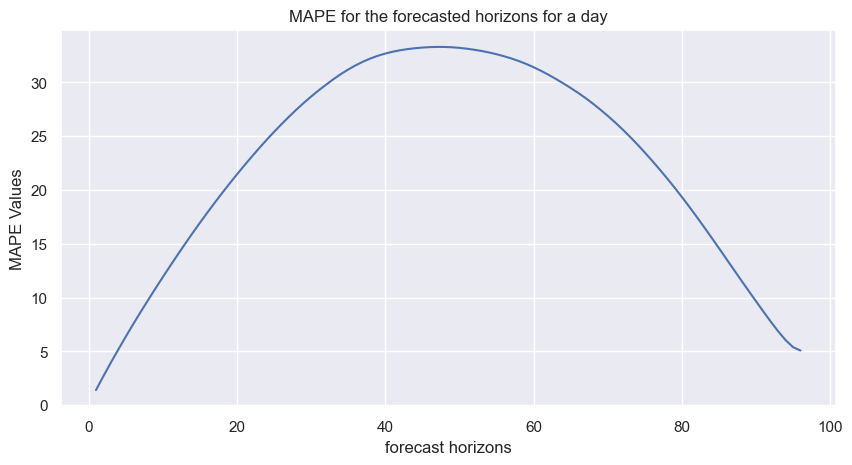

,MAPE
1,1.401417
2,2.694226
3,3.947104
4,5.162203
5,6.348202
...,...
92,7.753356
93,6.852569
94,6.038328
95,5.387572


In [23]:
MAPE=[] #initialiazing mae empty list
'''
The following loop will provide the shifts for energy demand for the second half of the dataset and 
compare it with the original energy demand for second half and then provide  mean absolute percentage error for each 
shift 
'''
for i in range(1,97):
    shifts=EirGridSystem['Demand'].shift(i) # shift the dataset 
    first_half_shift,second_half_shift=np.array_split(shifts,2) # proving two dataset containing the shifts 
    mapez=(mape(second_half['Demand'],second_half_shift))*100 #providing mape for each shift
    MAPE.append(mapez) # appending mape to their list
    
Mape_df= pd.DataFrame(MAPE) # creating mape dataframe
Mape_df.index=np.arange(1,97,1)   # crating indexes for mape dataframe 
plt.plot(Mape_df)  # plotting mape
sns.set_style("darkgrid") #setting grid
plt.xlabel('forecast horizons') # x labels
plt.ylabel('MAPE Values') # yalbel

plt.title('MAPE for the forecasted horizons for a day') # grapth title
plt.show() # displaying the results

#Giving Name to Mape values  
Mape_df.columns=['MAPE']
Mape_df # displaying Mape df